# Modulate and demodulate phase shift keying (PSK) signal from a random binary sequence


1. Modulation

In [28]:
import matplotlib.pyplot as plt     #khai báo thư viện
import numpy as np

+ Generate and plot the binary data sequence

In [29]:
x = np.random.randint(2,size=30) # tao day nhi phan ngau nhien

In [30]:
    N = len(x)

In [31]:
Tb = 0.0001     # toc do
nb = 100        # Tín hiệu số trên mỗi bit
t1 = np.arange(Tb/nb,nb*N*(Tb/nb)+(Tb/nb),Tb/nb)    # Khoảng thời gian

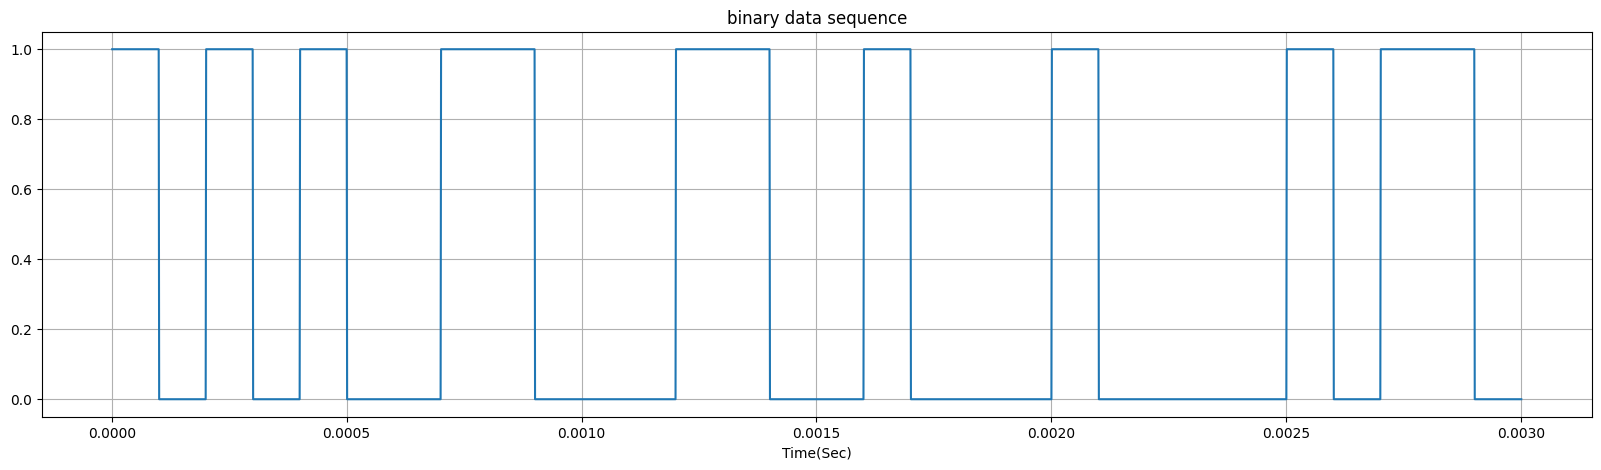

In [32]:
digit = np.empty((0,1), int)                # tao ra dãy nhị phân     
for n in range(0,N):
    if x[n] == 1:
        sig = np.ones(nb)
    else:
        sig = np.zeros(nb)
    digit = np.append(digit, sig)
digit.reshape(-1)
plt.title("binary data sequence")
plt.xlabel('Time(Sec)')
plt.rcParams['figure.figsize'] = [20, 5]
plt.grid()
plt.plot(t1,digit)

+ Generate and plot the carrier signal

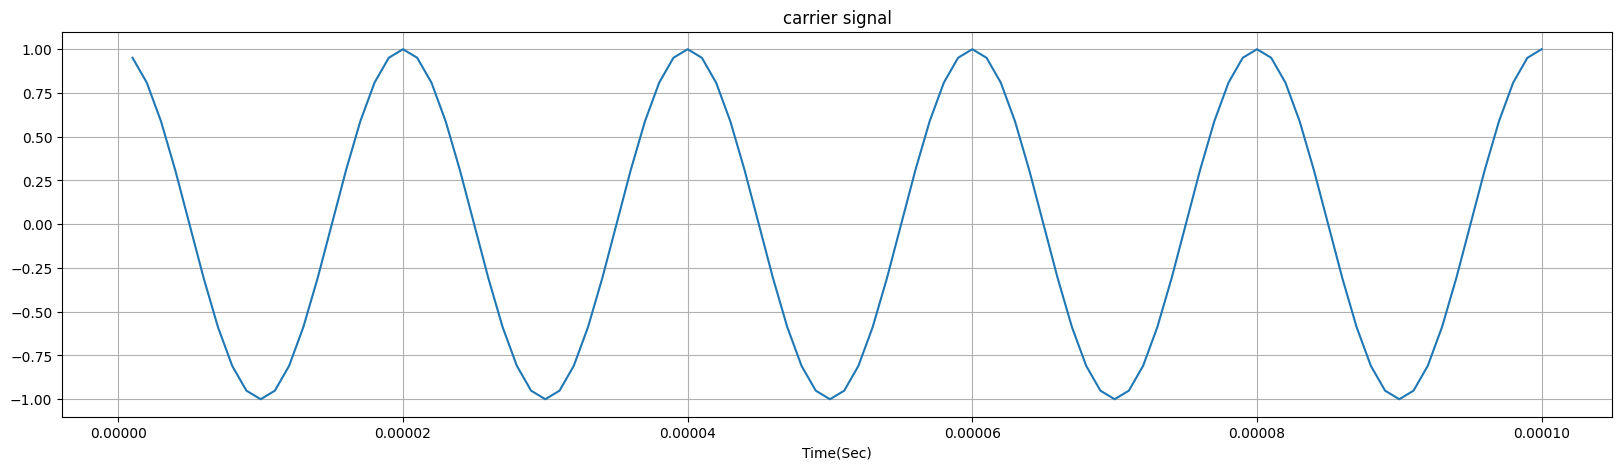

In [33]:
br = 1/Tb
fc = br*5
t2 = np.arange(Tb/nb,nb*(Tb/nb)+(Tb/nb),Tb/nb)
cs = np.cos(2*np.pi*fc*t2)
plt.title("carrier signal")
plt.xlabel('Time(Sec)')
plt.plot(t2, cs)
plt.grid()
plt.show()

+ Perform PSK modulation and plot the PSK modulated signal

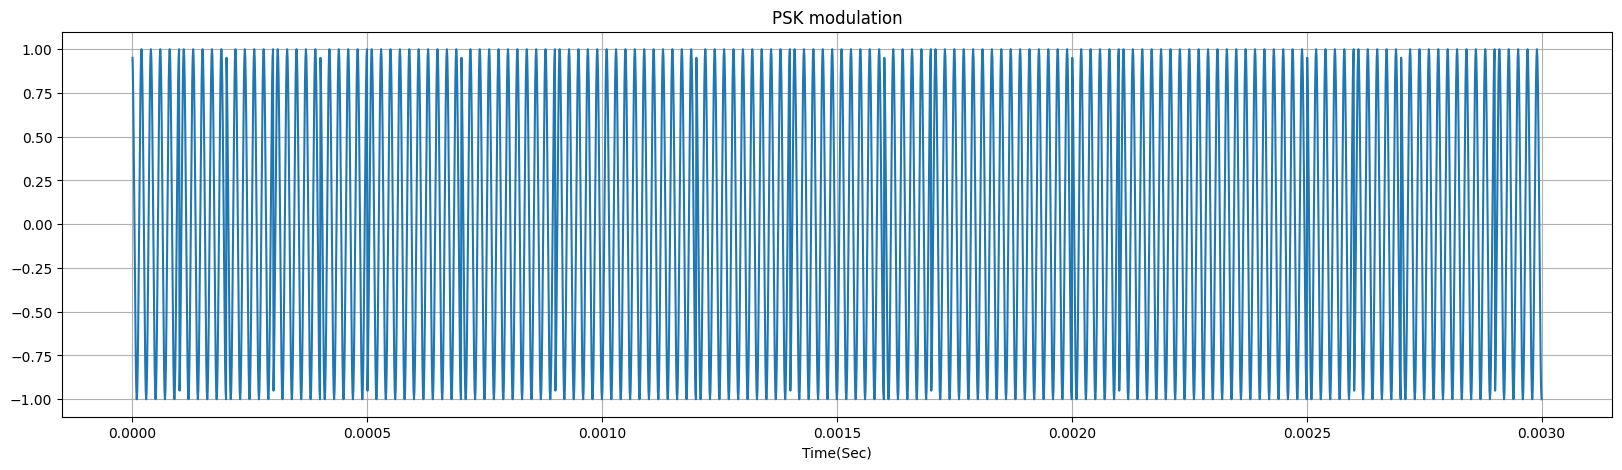

In [34]:
mod = np.empty((0,1), int)
for i in range(0,N):
    if x[i] == 1:
        y = cs
    else:
        y = -cs
    mod = np.append(mod, y)
plt.title("PSK modulation")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t1, mod)
plt.show()

2. Demodulation

+ Correlate the PSK modulated signal with the carrier signal to generate decision variables

In [35]:
s = len(t2)
demod = np.empty((0,1), int)
for n in range(s, len(mod)+1, s):
    mm = cs*mod[(n-(s)):n]
    z = np.trapz(t2,mm)
    rz = np.round(2*z/Tb)
    if rz > 0.5:
        a = 1
    else:
        a = 0
    demod = np.append(demod, a)

+ Obtain the demodulated binary data based on the decision variables

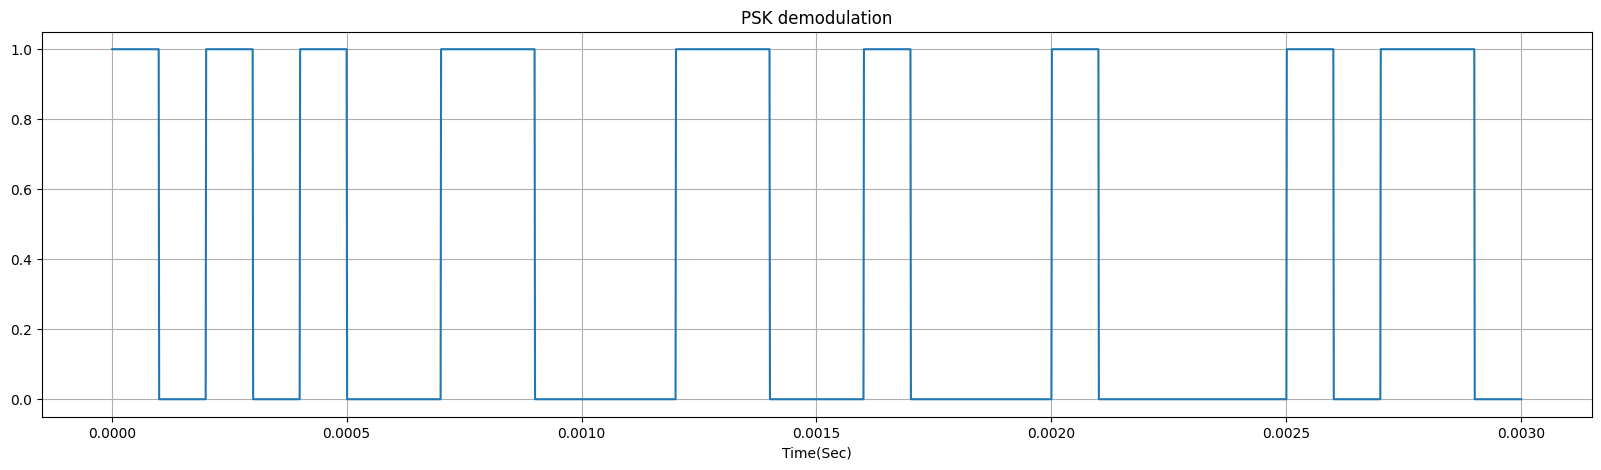

In [36]:
rdigit = np.empty((0,1), int)
for n in range(0, len(demod)):
    if demod[n] == 1:
        rsig = np.ones(nb)
    else:
        rsig = np.zeros(nb)
    rdigit = np.append(rdigit, rsig)
t3 = np.arange(Tb/nb,nb*len(demod)*(Tb/nb)+(Tb/nb),Tb/nb)
plt.title("PSK demodulation")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t3, rdigit)
plt.show()

3. Investigate the PSK modulation/demodulation under the effects of Gaussian noise

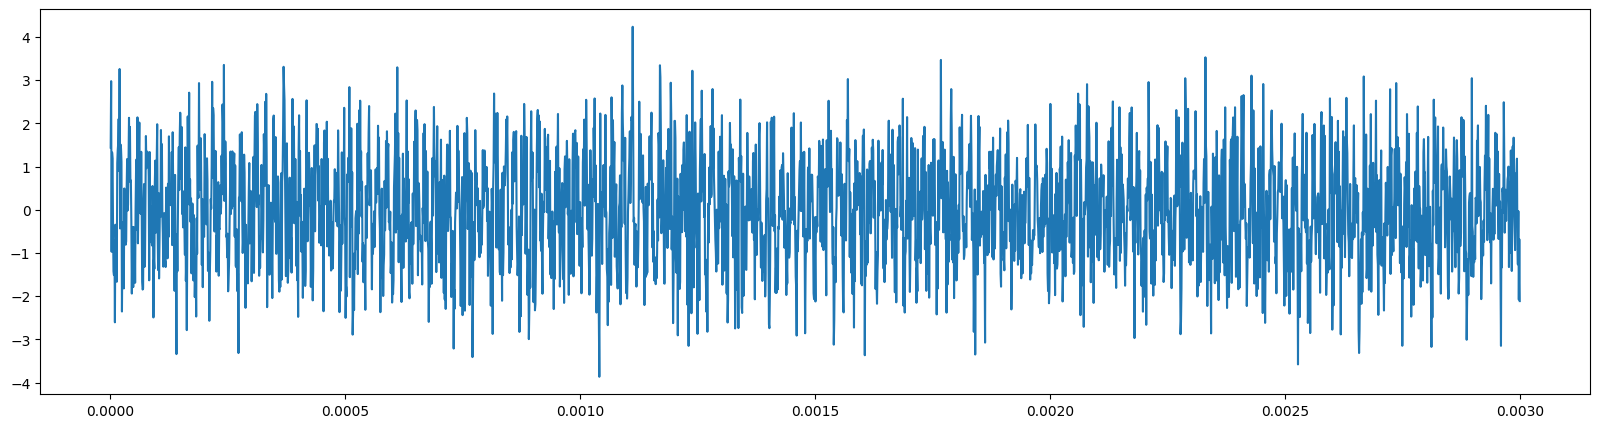

In [37]:
noise = np.random.normal(0,1,len(t1))
rt = mod + noise
plt.plot(t1,rt)

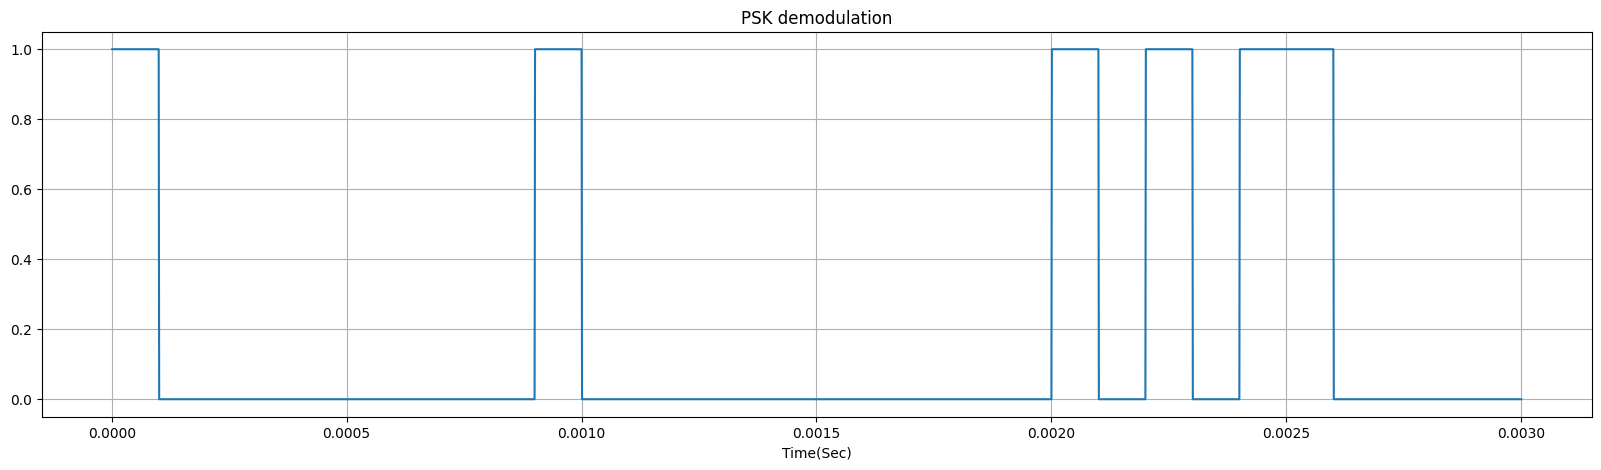

In [40]:
demod_n = np.empty((0,1), int)
for n in range(s, len(rt)+1, s):
    mm = cs*rt[(n-(s)):n]
    z = np.trapz(t2,mm)
    rz = np.round(2*z/Tb)
    if rz > 0.5:
        a = 1
    else:
        a = 0
    demod_n = np.append(demod_n, a)
rdigit_n = np.empty((0,1), int)
for n in range(0, len(demod_n)):
    if demod_n[n] == 1:
        rsig = np.ones(nb)
    else:
        rsig = np.zeros(nb)
    rdigit_n = np.append(rdigit_n, rsig)
t3 = np.arange(Tb/nb,nb*len(demod_n)*(Tb/nb)+(Tb/nb),Tb/nb)
plt.title("PSK demodulation")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t3, rdigit_n)
plt.show()

In [39]:
cnt = 0
for i in range(len(demod_n)):
    if x[i] != demod_n[i]:
        cnt = cnt + 1
print("bit error probability: ", cnt/len(x))

bit error probability:  0.4
